In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Define the paths to your image and csv folders
train_val_dir = "C:\\Users\\HP\\Desktop\\ML Assignment\\charts\\train_val"
test_dir = "C:\\Users\\HP\\Desktop\\ML Assignment\\charts\\test"
train_path_labels = "C:\\Users\\HP\\Desktop\\ML Assignment\\charts\\train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [4]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # img = Image.open(os.path.join(train_val_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy') 

In [5]:
x_train.shape

(1000, 128, 128, 3)

In [6]:
x_train[:5]
y_train[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [7]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # img = Image.open(os.path.join(test_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy') 

In [8]:
x_test.shape

(50, 128, 128, 3)

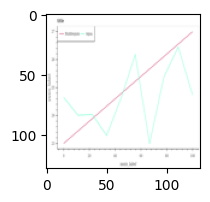

In [9]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [10]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]

# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

y_train
y_train.shape
y_test.shape

(50,)

In [11]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
    # image_label = train_val_labels.iloc[index]['type']
    # plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

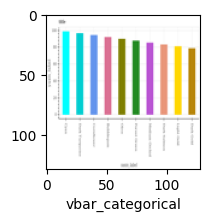

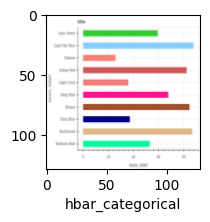

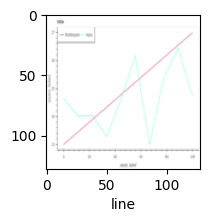

In [12]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [13]:
# now we have mapped the corresponding labels to the image

In [14]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [15]:
x_test.shape

(1000, 128, 128, 3)

In [16]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [17]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [18]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 35s 925ms/step - loss: 6.2027 - accuracy: 0.2130
Epoch 2/10
32/32 [==============================] - 30s 929ms/step - loss: 1.6101 - accuracy: 0.2510
Epoch 3/10
32/32 [==============================] - 33s 1s/step - loss: 1.6151 - accuracy: 0.2530
Epoch 4/10
32/32 [==============================] - 30s 930ms/step - loss: 1.6094 - accuracy: 0.2250
Epoch 5/10
32/32 [==============================] - 30s 950ms/step - loss: 1.5729 - accuracy: 0.2510
Epoch 6/10
32/32 [==============================] - 25s 777ms/step - loss: 1.5725 - accuracy: 0.2690
Epoch 7/10
32/32 [==============================] - 25s 792ms/step - loss: 1.5859 - accuracy: 0.2760
Epoch 8/10
32/32 [==============================] - 25s 768ms/step - loss: 1.5705 - accuracy: 0.2810
Epoch 9/10
32/32 [==============================] - 24s 764ms/step - loss: 1.5425 - accuracy: 0.3070
Epoch 10/10
32/32 [==============================] - 24s 758ms/step - loss: 1.5707 - accuracy:

In [19]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [20]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 2s 205ms/step - loss: 1.5684 - accuracy: 0.3400


[1.5684006214141846, 0.3400000035762787]

In [21]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 1s 144ms/step


In [23]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [22]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 1.6204 - accuracy: 0.1312 - val_loss: 1.9174 - val_accuracy: 0.2400
Epoch 2/50
1/1 [==============================] - 10s 10s/step - loss: 1.9540 - accuracy: 0.1912 - val_loss: 1.6787 - val_accuracy: 0.1850
Epoch 3/50
1/1 [==============================] - 10s 10s/step - loss: 1.6369 - accuracy: 0.2037 - val_loss: 1.6523 - val_accuracy: 0.2450
Epoch 4/50
1/1 [==============================] - 13s 13s/step - loss: 1.6065 - accuracy: 0.2550 - val_loss: 1.6283 - val_accuracy: 0.1900
Epoch 5/50
1/1 [==============================] - 10s 10s/step - loss: 1.5823 - accuracy: 0.2025 - val_loss: 1.5863 - val_accuracy: 0.2050
Epoch 6/50
1/1 [==============================] - 8s 8s/step - loss: 1.5467 - accuracy: 0.2188 - val_loss: 1.5355 - val_accuracy: 0.2950
Epoch 7/50
1/1 [==============================] - 7s 7s/step - loss: 1.4996 - accuracy: 0.3187 - val_loss: 1.5026 - val_accuracy: 0.3800
Epoch 8/50
1/1 [===============

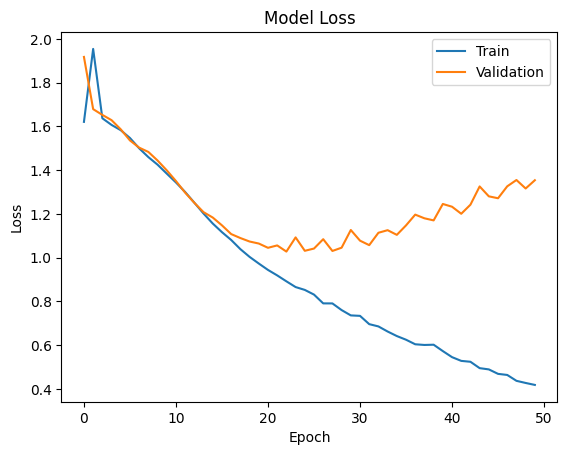

In [23]:
# modify the model architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [24]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 79ms/step - loss: 1.3536 - accuracy: 0.5700


[1.3536299467086792, 0.5699999928474426]

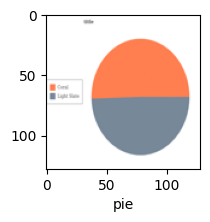

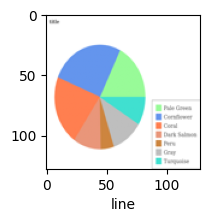

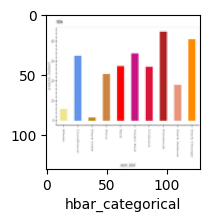

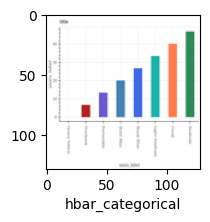

In [25]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [26]:
# Observation: we can see some wrong predictions

In [27]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 74ms/step


array([[3.98628294e-01, 3.28482419e-01, 1.91176027e-01, 5.92758413e-03,
        7.57857263e-02],
       [7.41425976e-02, 3.54651697e-02, 8.82150634e-05, 1.20569998e-03,
        8.89098346e-01],
       [3.16978768e-02, 1.10717621e-04, 2.61216337e-04, 1.29965483e-04,
        9.67800260e-01],
       [9.00965512e-01, 2.97645852e-06, 9.47386725e-04, 1.28745043e-03,
        9.67965648e-02],
       [6.15901232e-01, 1.22926265e-01, 2.20896512e-01, 4.03459370e-03,
        3.62414047e-02]], dtype=float32)

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 0, 0]

In [31]:
y_test[:5]

array([0, 4, 4, 4, 0])

In [32]:
# here we see some values are not matching

'dot_line'

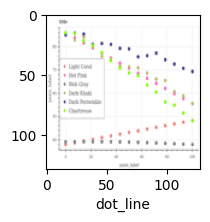

In [33]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [34]:
# some values are not matching

In [35]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.43      0.51      0.47        37
           1       0.74      0.77      0.76        44
           2       0.64      0.44      0.52        48
           3       0.41      0.52      0.46        33
           4       0.64      0.61      0.62        38

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.59      0.57      0.57       200



In [36]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[19  7  2  2  7]
 [ 5 34  0  2  3]
 [ 8  2 21 17  0]
 [ 1  3  9 17  3]
 [11  0  1  3 23]]


Text(95.72222222222221, 0.5, 'Actual')

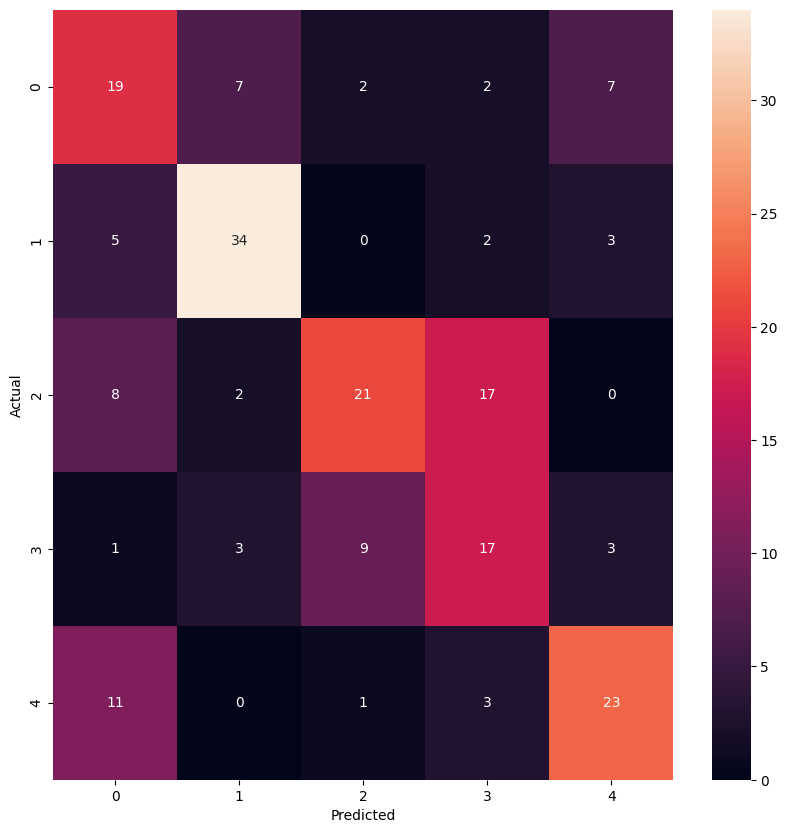

In [37]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [38]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [39]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 43s 1us/step


In [40]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [41]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
    layer.trainable = False

In [42]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     